In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
train = pd.read_csv('data/churn_train.csv')

In [3]:
train.shape

(40000, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [30]:
column_counts = train.apply(lambda x: x.count(), axis=0)
keep_columns = column_counts[column_counts == column_counts.max()]
dense_train = train.ix[:,keep_columns.index]
dense_train.shape

/Users/kevinmagana/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


(40000, 9)

In [11]:
dense_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
avg_dist                  40000 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 2.5+ MB


In [31]:
dense_train.describe()


,avg_dist,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,1.050000,8.300000,3.000000,100.000000
max,160.960000,8.000000,100.000000,125.000000,100.000000


## Visualize

### Percentage of Weekend Rides

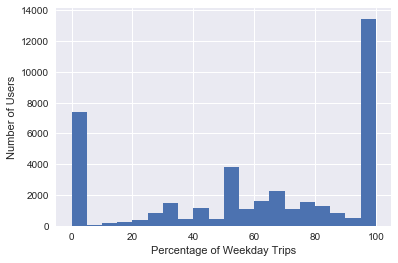

In [32]:
dense_train.weekday_pct.hist(bins=20)
plt.xlabel('Percentage of Weekday Trips')
plt.ylabel('Number of Users')



### Number of trips_in_first_30_days

(0, 30)

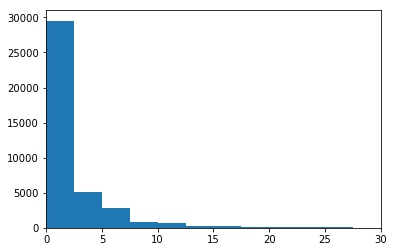

In [24]:
plt.hist(dense_train.trips_in_first_30_days, bins = 50 )
plt.xlim(0, 30)

### Surge in Percentage

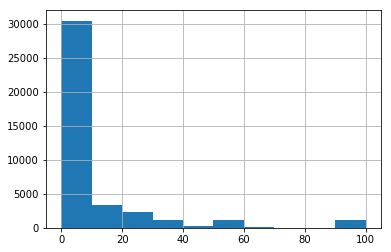

In [25]:
dense_train.surge_pct.hist()

In [26]:
### Average Surge

(0, 5)

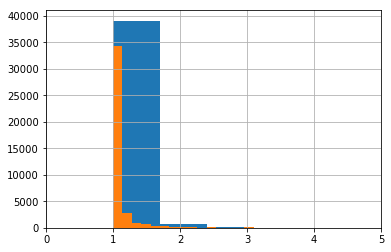

In [29]:
dense_train.avg_surge.hist()

plt.hist(dense_train.avg_surge, bins = 50 )
plt.xlim(0, 5)

In [36]:
dense_train['avg_surge'].describe()

count    40000.000000
mean         1.074956
std          0.222427
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

(0, 60)

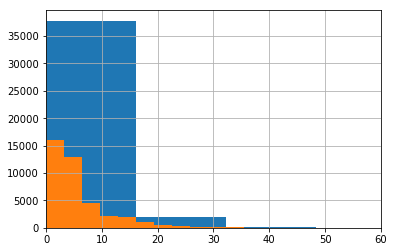

In [38]:
dense_train.avg_dist.hist()

plt.hist(dense_train.avg_dist, bins = 50 )
plt.xlim(0, 60)

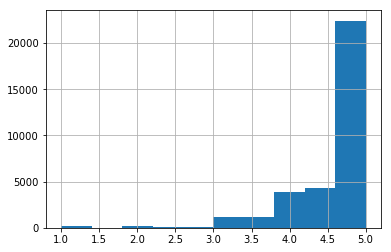

In [41]:
train.avg_rating_of_driver.hist()

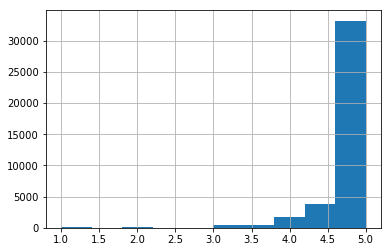

In [42]:
train.avg_rating_by_driver.hist()

## Data Cleaning

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [40]:
train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


# TRAIN DATA

In [4]:
## Cleaned Train Data
train = pd.read_csv('data/churn_train.csv')

clean = train

## Is IMPUTED Column? - Did we need to set the Nans to mean? 
# Imputed? TRUE == 1, Imputed? FALSE == 0
clean['Imputed?'] = clean['avg_rating_of_driver'].isnull() 
clean['Imputed?'] = np.where(clean['Imputed?']== True, 1,0)

## Fill NANs with MEAN 

clean['avg_rating_of_driver'] = clean['avg_rating_of_driver'].fillna\
         (clean['avg_rating_of_driver'].mean())

clean['avg_rating_by_driver'] = clean['avg_rating_by_driver'].fillna\
         (clean['avg_rating_by_driver'].mean())
    

## ANDROID = 0 , iPhone == 1 
clean['phone'] = np.where(clean['phone'] == 'Android', 0, 1)


### luxury_car_user TRUE == 1, FALSE == 0
clean['luxury_car_user'] = np.where(clean['luxury_car_user'] == True, 1, 0)

### Create Week Number Column
clean['Week_Number'] = pd.to_datetime(clean['signup_date'], errors='coerce').dt.week
# Drop Sign_Up Date 
clean = clean.drop(['signup_date'], axis=1)

### Create a Churn Column 
## Convert last_trip_date to date_time frame
clean['last_trip_date'] = pd.to_datetime(clean['last_trip_date'], errors='coerce')
clean['Churn?'] = np.where(clean['last_trip_date'] >= '2014-06-01', 0, 1 )

# Drop last_trip_date
clean = clean.drop(['last_trip_date'], axis=1)

# Get Dummies on CITY 
clean= pd.get_dummies(clean)
                      

In [7]:
# train = pd.read_csv('data/churn_train.csv')
# clean = train
clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Imputed?,Week_Number,Churn?,city_Astapor,city_King's Landing,city_Winterfell
0,6.94,5.0,5.000000,1.00,0,0.0,0,0,100.0,0,2,1,1,0,0
1,8.06,5.0,5.000000,1.00,0,0.0,2,1,0.0,0,4,1,1,0,0
2,21.50,4.0,4.601697,1.00,1,0.0,1,1,100.0,1,1,1,0,0,1
3,9.46,5.0,4.601697,2.75,0,100.0,1,0,100.0,1,2,1,0,0,1
4,13.77,5.0,4.601697,1.00,1,0.0,0,0,100.0,1,5,1,0,0,1


Accuracy = 0.747550131208
Precision = 0.80534978462
Recall = 0.785405623139


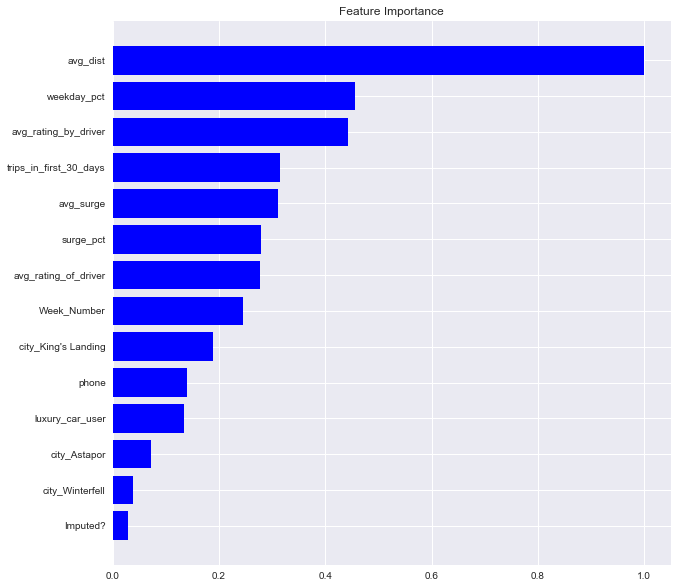

In [121]:
## RANDOM FOREST CLASSIFER 
y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()
columns = clean.drop('Churn?', axis=1).columns 
p = ChurnPipeline(RandomForestClassifier(), False)
p.fit(X, y)
p.cross_val_score(X, y)
p.feature_importance(columns)


In [24]:
## LOGISTIC REGRESSION 
y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()




p = ChurnPipeline(LogisticRegression( C=.0001

), True)
p.fit(X, y)
p.cross_val_score(X, y)

print p.Pipeline.steps[1][1].coef_
print columns



Accuracy = 0.724724934052
Precision = 0.744930473543
Recall = 0.850088225237
[[  7.87632930e-02   2.90646439e-02   1.44612960e-02   2.90481160e-03
   -2.03871361e-01  -1.57042099e-02  -1.78302678e-01  -1.86263186e-01
   -1.00911200e-04   1.21792766e-01   1.91010302e-02   1.44907117e-01
   -2.15900728e-01   3.75968383e-02]]
Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'phone', u'surge_pct', u'trips_in_first_30_days',
       u'luxury_car_user', u'weekday_pct', u'Imputed?', u'Week_Number',
       u'city_Astapor', u'city_King's Landing', u'city_Winterfell'],
      dtype='object')


In [127]:
## SUPPORT VECTOR MACHINE 

y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()
columns = clean.drop('Churn?', axis=1).columns 

p = ChurnPipeline(SVC(), True)
p.fit(X, y)
p.cross_val_score(X, y)


Accuracy = 0.768549965836
Precision = 0.781375772574
Recall = 0.873678247664


In [130]:
### ADA Boost -- AdaBoostClassifier

y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()
columns = clean.drop('Churn?', axis=1).columns 

p = ChurnPipeline(AdaBoostClassifier(), False)
p.fit(X, y)
p.cross_val_score(X, y)


Accuracy = 0.782699787889
Precision = 0.805161184458
Recall = 0.860060520451


In [134]:
### GradientBoostingClassifier

y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()
columns = clean.drop('Churn?', axis=1).columns 

p = ChurnPipeline(GradientBoostingClassifier(), True)
p.fit(X, y)
p.cross_val_score(X, y)

Accuracy = 0.787999825458
Precision = 0.809461719794
Recall = 0.863705415054


In [133]:
X1 = clean.drop('Churn?', axis=1) 

X1.dtypes

categorical_features_indices = np.where(X1.dtypes != np.float)[0]


avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
phone                       int64
surge_pct                 float64
trips_in_first_30_days      int64
luxury_car_user             int64
weekday_pct               float64
Imputed?                    int64
Week_Number                 int64
city_Astapor                uint8
city_King's Landing         uint8
city_Winterfell             uint8
dtype: object

In [139]:
### Catboost 

X_train, X_validation, y_train, y_validation = train_test_split\
(X, y, train_size=0.85, random_state=1234)


model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42
)


model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
#     verbose=True,  # you can uncomment this for text output
)


print 'Catboost Model validation accuracy: {:.4}'.format(
    accuracy_score(y_validation, model.predict(X_validation))
)

print 'Catboost Model validation Precision: {:.4}'.format(
    precision_score(y_validation, model.predict(X_validation))
)

print 'Catboost Model validation accuracy: {:.4}'.format(
    recall_score(y_validation, model.predict(X_validation))
)



0: learn: 0.6801815	test: 0.6803053	bestTest: 0.6803053 (0)	total: 20.5ms	remaining: 20.4s
1: learn: 0.6672945	test: 0.6675387	bestTest: 0.6675387 (1)	total: 39.4ms	remaining: 19.7s
2: learn: 0.6564416	test: 0.6568363	bestTest: 0.6568363 (2)	total: 58.9ms	remaining: 19.6s
3: learn: 0.6467489	test: 0.6472131	bestTest: 0.6472131 (3)	total: 78.6ms	remaining: 19.6s
4: learn: 0.6367542	test: 0.6372302	bestTest: 0.6372302 (4)	total: 97.7ms	remaining: 19.5s
5: learn: 0.6266485	test: 0.6272345	bestTest: 0.6272345 (5)	total: 118ms	remaining: 19.6s
6: learn: 0.6183116	test: 0.6189129	bestTest: 0.6189129 (6)	total: 139ms	remaining: 19.7s
7: learn: 0.6099434	test: 0.6107635	bestTest: 0.6107635 (7)	total: 159ms	remaining: 19.7s
8: learn: 0.6023853	test: 0.6033535	bestTest: 0.6033535 (8)	total: 179ms	remaining: 19.7s
9: learn: 0.5952098	test: 0.5962056	bestTest: 0.5962056 (9)	total: 197ms	remaining: 19.5s
10: learn: 0.5888888	test: 0.5898795	bestTest: 0.5898795 (10)	total: 227ms	remaining: 20.4s
11:

96: learn: 0.4635245	test: 0.4706594	bestTest: 0.4706594 (96)	total: 2.34s	remaining: 21.8s
97: learn: 0.4633179	test: 0.4705141	bestTest: 0.4705141 (97)	total: 2.38s	remaining: 21.9s
98: learn: 0.4631289	test: 0.4703387	bestTest: 0.4703387 (98)	total: 2.4s	remaining: 21.9s
99: learn: 0.4629663	test: 0.4702724	bestTest: 0.4702724 (99)	total: 2.44s	remaining: 22s
100: learn: 0.4628175	test: 0.4701328	bestTest: 0.4701328 (100)	total: 2.48s	remaining: 22.1s
101: learn: 0.4625193	test: 0.4698262	bestTest: 0.4698262 (101)	total: 2.52s	remaining: 22.2s
102: learn: 0.462278	test: 0.469639	bestTest: 0.469639 (102)	total: 2.56s	remaining: 22.3s
103: learn: 0.4619269	test: 0.4693176	bestTest: 0.4693176 (103)	total: 2.6s	remaining: 22.4s
104: learn: 0.4617401	test: 0.4691556	bestTest: 0.4691556 (104)	total: 2.63s	remaining: 22.4s
105: learn: 0.4615808	test: 0.469029	bestTest: 0.469029 (105)	total: 2.66s	remaining: 22.4s
106: learn: 0.4614354	test: 0.4689092	bestTest: 0.4689092 (106)	total: 2.69s	

187: learn: 0.4514202	test: 0.4615676	bestTest: 0.4615667 (186)	total: 4.66s	remaining: 20.1s
188: learn: 0.4513539	test: 0.4615109	bestTest: 0.4615109 (188)	total: 4.68s	remaining: 20.1s
189: learn: 0.4512826	test: 0.4614438	bestTest: 0.4614438 (189)	total: 4.71s	remaining: 20.1s
190: learn: 0.4511714	test: 0.4613875	bestTest: 0.4613875 (190)	total: 4.74s	remaining: 20.1s
191: learn: 0.4510901	test: 0.4613437	bestTest: 0.4613437 (191)	total: 4.76s	remaining: 20s
192: learn: 0.451023	test: 0.46133	bestTest: 0.46133 (192)	total: 4.78s	remaining: 20s
193: learn: 0.4509305	test: 0.4612581	bestTest: 0.4612581 (193)	total: 4.8s	remaining: 19.9s
194: learn: 0.4508683	test: 0.4612408	bestTest: 0.4612408 (194)	total: 4.83s	remaining: 19.9s
195: learn: 0.4508099	test: 0.4612072	bestTest: 0.4612072 (195)	total: 4.86s	remaining: 19.9s
196: learn: 0.4507707	test: 0.4611729	bestTest: 0.4611729 (196)	total: 4.88s	remaining: 19.9s
197: learn: 0.450726	test: 0.461139	bestTest: 0.461139 (197)	total: 4.

275: learn: 0.4449673	test: 0.4579013	bestTest: 0.4579012 (274)	total: 6.75s	remaining: 17.7s
276: learn: 0.4449063	test: 0.457853	bestTest: 0.457853 (276)	total: 6.78s	remaining: 17.7s
277: learn: 0.4447926	test: 0.4578079	bestTest: 0.4578079 (277)	total: 6.8s	remaining: 17.7s
278: learn: 0.4447734	test: 0.4578011	bestTest: 0.4578011 (278)	total: 6.82s	remaining: 17.6s
279: learn: 0.4447124	test: 0.4577837	bestTest: 0.4577837 (279)	total: 6.84s	remaining: 17.6s
280: learn: 0.4446438	test: 0.4577433	bestTest: 0.4577433 (280)	total: 6.86s	remaining: 17.6s
281: learn: 0.4445994	test: 0.4577318	bestTest: 0.4577318 (281)	total: 6.88s	remaining: 17.5s
282: learn: 0.4445394	test: 0.4576967	bestTest: 0.4576967 (282)	total: 6.9s	remaining: 17.5s
283: learn: 0.4444957	test: 0.4576824	bestTest: 0.4576824 (283)	total: 6.92s	remaining: 17.4s
284: learn: 0.4444433	test: 0.4576753	bestTest: 0.4576753 (284)	total: 6.93s	remaining: 17.4s
285: learn: 0.444354	test: 0.4575896	bestTest: 0.4575896 (285)	t

365: learn: 0.4399337	test: 0.4555973	bestTest: 0.4555973 (365)	total: 8.85s	remaining: 15.3s
366: learn: 0.4398495	test: 0.4555599	bestTest: 0.4555599 (366)	total: 8.87s	remaining: 15.3s
367: learn: 0.4397904	test: 0.4555595	bestTest: 0.4555595 (367)	total: 8.89s	remaining: 15.3s
368: learn: 0.4397061	test: 0.4555038	bestTest: 0.4555038 (368)	total: 8.91s	remaining: 15.2s
369: learn: 0.4396647	test: 0.4554915	bestTest: 0.4554915 (369)	total: 8.93s	remaining: 15.2s
370: learn: 0.4396199	test: 0.4554633	bestTest: 0.4554633 (370)	total: 8.95s	remaining: 15.2s
371: learn: 0.439575	test: 0.4554676	bestTest: 0.4554633 (370)	total: 8.97s	remaining: 15.1s
372: learn: 0.4395288	test: 0.4554084	bestTest: 0.4554084 (372)	total: 8.99s	remaining: 15.1s
373: learn: 0.4394518	test: 0.4553659	bestTest: 0.4553659 (373)	total: 9.01s	remaining: 15.1s
374: learn: 0.4393525	test: 0.4552856	bestTest: 0.4552856 (374)	total: 9.03s	remaining: 15.1s
375: learn: 0.4392724	test: 0.4552592	bestTest: 0.4552592 (37

454: learn: 0.4354656	test: 0.4536313	bestTest: 0.4536313 (454)	total: 11s	remaining: 13.1s
455: learn: 0.435436	test: 0.4536232	bestTest: 0.4536232 (455)	total: 11s	remaining: 13.1s
456: learn: 0.4354004	test: 0.453607	bestTest: 0.453607 (456)	total: 11s	remaining: 13.1s
457: learn: 0.4353889	test: 0.4536115	bestTest: 0.453607 (456)	total: 11s	remaining: 13.1s
458: learn: 0.4353448	test: 0.4535754	bestTest: 0.4535754 (458)	total: 11.1s	remaining: 13s
459: learn: 0.4353066	test: 0.4535747	bestTest: 0.4535747 (459)	total: 11.1s	remaining: 13s
460: learn: 0.4352549	test: 0.4535307	bestTest: 0.4535307 (460)	total: 11.1s	remaining: 13s
461: learn: 0.4352236	test: 0.453522	bestTest: 0.453522 (461)	total: 11.1s	remaining: 12.9s
462: learn: 0.4351954	test: 0.4535222	bestTest: 0.453522 (461)	total: 11.1s	remaining: 12.9s
463: learn: 0.4351639	test: 0.4535272	bestTest: 0.453522 (461)	total: 11.2s	remaining: 12.9s
464: learn: 0.435107	test: 0.4534845	bestTest: 0.4534845 (464)	total: 11.2s	remain

551: learn: 0.4319102	test: 0.4524609	bestTest: 0.4524427 (548)	total: 13.3s	remaining: 10.8s
552: learn: 0.4318824	test: 0.4524434	bestTest: 0.4524427 (548)	total: 13.3s	remaining: 10.8s
553: learn: 0.4318823	test: 0.4524434	bestTest: 0.4524427 (548)	total: 13.3s	remaining: 10.7s
554: learn: 0.4318321	test: 0.4524503	bestTest: 0.4524427 (548)	total: 13.4s	remaining: 10.7s
555: learn: 0.4318068	test: 0.4524456	bestTest: 0.4524427 (548)	total: 13.4s	remaining: 10.7s
556: learn: 0.4317835	test: 0.4524619	bestTest: 0.4524427 (548)	total: 13.4s	remaining: 10.7s
557: learn: 0.4317834	test: 0.4524618	bestTest: 0.4524427 (548)	total: 13.4s	remaining: 10.6s
558: learn: 0.4317592	test: 0.4524422	bestTest: 0.4524422 (558)	total: 13.5s	remaining: 10.6s
559: learn: 0.4317093	test: 0.4524296	bestTest: 0.4524296 (559)	total: 13.5s	remaining: 10.6s
560: learn: 0.4317092	test: 0.4524295	bestTest: 0.4524295 (560)	total: 13.5s	remaining: 10.6s
561: learn: 0.4316618	test: 0.4524264	bestTest: 0.4524264 (5

640: learn: 0.4291888	test: 0.4518072	bestTest: 0.4518072 (640)	total: 15.4s	remaining: 8.61s
641: learn: 0.429157	test: 0.4518089	bestTest: 0.4518072 (640)	total: 15.4s	remaining: 8.6s
642: learn: 0.4291367	test: 0.4518004	bestTest: 0.4518004 (642)	total: 15.4s	remaining: 8.57s
643: learn: 0.4290949	test: 0.4517889	bestTest: 0.4517889 (643)	total: 15.5s	remaining: 8.54s
644: learn: 0.4290599	test: 0.4517915	bestTest: 0.4517889 (643)	total: 15.5s	remaining: 8.52s
645: learn: 0.4290334	test: 0.4517868	bestTest: 0.4517868 (645)	total: 15.5s	remaining: 8.5s
646: learn: 0.428979	test: 0.4517634	bestTest: 0.4517634 (646)	total: 15.5s	remaining: 8.47s
647: learn: 0.4289392	test: 0.4517495	bestTest: 0.4517495 (647)	total: 15.5s	remaining: 8.45s
648: learn: 0.4288912	test: 0.4517276	bestTest: 0.4517276 (648)	total: 15.6s	remaining: 8.42s
649: learn: 0.4288544	test: 0.4517223	bestTest: 0.4517223 (649)	total: 15.6s	remaining: 8.39s
650: learn: 0.4288087	test: 0.4517171	bestTest: 0.4517171 (650)	

731: learn: 0.4267398	test: 0.4511958	bestTest: 0.4511958 (731)	total: 17.5s	remaining: 6.42s
732: learn: 0.4267222	test: 0.4511915	bestTest: 0.4511915 (732)	total: 17.6s	remaining: 6.39s
733: learn: 0.4266912	test: 0.4511923	bestTest: 0.4511915 (732)	total: 17.6s	remaining: 6.37s
734: learn: 0.4266736	test: 0.4511896	bestTest: 0.4511896 (734)	total: 17.6s	remaining: 6.35s
735: learn: 0.4266244	test: 0.4511996	bestTest: 0.4511896 (734)	total: 17.6s	remaining: 6.33s
736: learn: 0.4266022	test: 0.4512061	bestTest: 0.4511896 (734)	total: 17.7s	remaining: 6.3s
737: learn: 0.4265523	test: 0.4511641	bestTest: 0.4511641 (737)	total: 17.7s	remaining: 6.28s
738: learn: 0.426527	test: 0.4511434	bestTest: 0.4511434 (738)	total: 17.7s	remaining: 6.25s
739: learn: 0.4265253	test: 0.451146	bestTest: 0.4511434 (738)	total: 17.7s	remaining: 6.23s
740: learn: 0.4264648	test: 0.4511119	bestTest: 0.4511119 (740)	total: 17.8s	remaining: 6.21s
741: learn: 0.4264335	test: 0.4511133	bestTest: 0.4511119 (740)

820: learn: 0.4246941	test: 0.4508207	bestTest: 0.4508104 (818)	total: 19.6s	remaining: 4.28s
821: learn: 0.4246669	test: 0.4508218	bestTest: 0.4508104 (818)	total: 19.6s	remaining: 4.25s
822: learn: 0.4246557	test: 0.4508161	bestTest: 0.4508104 (818)	total: 19.7s	remaining: 4.23s
823: learn: 0.4246556	test: 0.4508161	bestTest: 0.4508104 (818)	total: 19.7s	remaining: 4.21s
824: learn: 0.4246394	test: 0.45082	bestTest: 0.4508104 (818)	total: 19.7s	remaining: 4.18s
825: learn: 0.4246394	test: 0.4508199	bestTest: 0.4508104 (818)	total: 19.7s	remaining: 4.16s
826: learn: 0.4246148	test: 0.4508316	bestTest: 0.4508104 (818)	total: 19.8s	remaining: 4.13s
827: learn: 0.4245851	test: 0.450815	bestTest: 0.4508104 (818)	total: 19.8s	remaining: 4.11s
828: learn: 0.4245835	test: 0.4508125	bestTest: 0.4508104 (818)	total: 19.8s	remaining: 4.08s
829: learn: 0.4245633	test: 0.4507906	bestTest: 0.4507906 (829)	total: 19.8s	remaining: 4.06s
830: learn: 0.4245497	test: 0.4507993	bestTest: 0.4507906 (829)

909: learn: 0.422769	test: 0.4504687	bestTest: 0.450417 (890)	total: 21.7s	remaining: 2.15s
910: learn: 0.4227519	test: 0.4504716	bestTest: 0.450417 (890)	total: 21.7s	remaining: 2.12s
911: learn: 0.4227228	test: 0.4504593	bestTest: 0.450417 (890)	total: 21.7s	remaining: 2.1s
912: learn: 0.4227228	test: 0.4504593	bestTest: 0.450417 (890)	total: 21.8s	remaining: 2.07s
913: learn: 0.4226884	test: 0.4504578	bestTest: 0.450417 (890)	total: 21.8s	remaining: 2.05s
914: learn: 0.4226884	test: 0.4504578	bestTest: 0.450417 (890)	total: 21.8s	remaining: 2.02s
915: learn: 0.422678	test: 0.4504567	bestTest: 0.450417 (890)	total: 21.8s	remaining: 2s
916: learn: 0.4226192	test: 0.4504555	bestTest: 0.450417 (890)	total: 21.9s	remaining: 1.98s
917: learn: 0.4225752	test: 0.4504601	bestTest: 0.450417 (890)	total: 21.9s	remaining: 1.95s
918: learn: 0.4225547	test: 0.4504502	bestTest: 0.450417 (890)	total: 21.9s	remaining: 1.93s
919: learn: 0.422535	test: 0.4504506	bestTest: 0.450417 (890)	total: 21.9s	r

Catboost Model validation accuracy: 0.7898
Catboost Model validation Precision: 0.808
Catboost Model validation accuracy: 0.8722


In [14]:
y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()


gradient_class_grid = {
    
    'n_estimators': [80, 100, 120],
    'learning_rate' : [.8, .1,  1.2] ,
    'max_depth': [3,4]

}

grid_search(GradientBoostingClassifier(), gradient_class_grid, X, y) 


('Best parameters:', {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 4})


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [19]:
y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()


rf_grid = {
    
    'n_estimators': [80, 100, 120],
    'max_features': [3, 4],
    'max_depth': [3,4]

}

results = grid_search(RandomForestClassifier(), rf_grid, X, y)
results

('Best parameters:', {'max_features': 4, 'n_estimators': 120, 'max_depth': 4})


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [3]:
from churn_pipeline import ChurnPipeline, grid_search
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from profit_curves import standard_confusion_matrix, profit_curve, \
    plot_profit_curve
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
clean['Churn?'].value_counts()

1    24968
0    15032
Name: Churn?, dtype: int64

# Building Test Data Pipeline

In [5]:
## Cleaned Train Data
test = pd.read_csv('data/churn_test.csv')
train = pd.read_csv('data/churn_train.csv')

clean_test = test

## Is IMPUTED Column? - Did we need to set the Nans to mean? 
# Imputed? TRUE == 1, Imputed? FALSE == 0
clean_test['Imputed?'] = clean_test['avg_rating_of_driver'].isnull() 
clean_test['Imputed?'] = np.where(clean_test['Imputed?']== True, 1,0)

## Fill NANs with MEAN -- Using Train Mean to fillnans on Test data

clean_test['avg_rating_of_driver'] = clean_test['avg_rating_of_driver'].fillna\
         (train['avg_rating_of_driver'].mean())

clean_test['avg_rating_by_driver'] = clean_test['avg_rating_by_driver'].fillna\
         (train['avg_rating_by_driver'].mean())
    

## ANDROID = 0 , iPhone == 1 
clean_test['phone'] = np.where(clean_test['phone'] == 'Android', 0, 1)


### luxury_car_user TRUE == 1, FALSE == 0
clean_test['luxury_car_user'] = np.where(clean_test['luxury_car_user'] == True, 1, 0)

### Create Week Number Column
clean_test['Week_Number'] = pd.to_datetime(clean_test['signup_date'], errors='coerce').dt.week
# Drop Sign_Up Date 
clean_test = clean_test.drop(['signup_date'], axis=1)

### Create a Churn Column 
## Convert last_trip_date to date_time frame
clean_test['last_trip_date'] = pd.to_datetime(clean_test['last_trip_date'], errors='coerce')
clean_test['Churn?'] = np.where(clean_test['last_trip_date'] >= '2014-06-01', 0, 1 )

# Drop last_trip_date
clean_test = clean_test.drop(['last_trip_date'], axis=1)

# Get Dummies on CITY 
clean_test= pd.get_dummies(clean_test)
                      

In [26]:
clean_test.head()



,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Imputed?,Week_Number,Churn?,city_Astapor,city_King's Landing,city_Winterfell
0,2.48,5.0,5.000000,1.0,0,0.0,2,1,100.0,0,2,1,0,0,1
1,10.81,5.0,5.000000,1.0,1,0.0,3,1,100.0,0,2,1,0,0,1
2,12.95,5.0,5.000000,1.0,0,0.0,1,1,100.0,0,3,1,1,0,0
3,3.92,5.0,4.601697,1.0,1,0.0,0,0,0.0,1,2,1,0,0,1
4,1.46,5.0,4.500000,1.0,1,0.0,2,0,100.0,0,2,1,1,0,0


In [6]:
from profit_curves import standard_confusion_matrix, profit_curve, \
    plot_profit_curve
    
## RANDOM FOREST CLASSIFER 
## Train Data
y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()

## Test 
y_test = clean_test['Churn?'].as_matrix()
X_test = clean_test.drop('Churn?', axis=1).as_matrix()

columns = clean_test.drop('Churn?', axis=1).columns 
p = ChurnPipeline(RandomForestClassifier(), False)
p.fit(X, y)

y_pred = p.predict(X_test)

print standard_confusion_matrix(y_test,y_pred )

print "Test Score of DEFAULT Random Forest Model"
print 'Accuracy Score: ', accuracy_score(y_test,y_pred ) 
print 'Precision Score: ', precision_score(y_test,y_pred ) 
print 'Recall Score: ', recall_score(y_test,y_pred )



[[4913 1226]
 [1315 2546]]
Test Score of DEFAULT Random Forest Model
Accuracy Score:  0.7459
Precision Score:  0.800293207363
Recall Score:  0.788856775851


In [33]:
## TUNED -- RANDOM FOREST CLASSIFER 
## Train Data

p = ChurnPipeline(RandomForestClassifier(n_estimators=120,\
                                         max_features = 3,
                                         max_depth =3,
    ), False)
p.fit(X, y)

y_pred = p.predict(X_test)

print standard_confusion_matrix(y_test,y_pred )

print "Test Score of TUNED Random Forest Model"
print 'Accuracy Score: ', accuracy_score(y_test,y_pred ) 
print 'Precision Score: ', precision_score(y_test,y_pred ) 
print 'Recall Score: ', recall_score(y_test,y_pred )


[[5658 2114]
 [ 570 1658]]
Test Score of TUNED Random Forest Model
Accuracy Score:  0.7316
Precision Score:  0.727997941328
Recall Score:  0.908477842004


[[ 0.18763783  0.81236217]
 [ 0.25092138  0.74907862]
 [ 0.1694434   0.8305566 ]
 ..., 
 [ 0.57824331  0.42175669]
 [ 0.21405645  0.78594355]
 [ 0.24688113  0.75311887]]
[ 25.      25.0075  25.015  ...,  37.725   37.7225  37.72  ]
[[ 0.1  0.9]
 [ 0.2  0.8]
 [ 0.   1. ]
 ..., 
 [ 0.3  0.7]
 [ 0.   1. ]
 [ 0.2  0.8]]
[ 25.      25.0075  25.015  ...,  37.725   37.7225  37.72  ]
[[ 0.07516603  0.92483397]
 [ 0.18286077  0.81713923]
 [ 0.04298671  0.95701329]
 ..., 
 [ 0.55687165  0.44312835]
 [ 0.03302919  0.96697081]
 [ 0.19943318  0.80056682]]
[ 25.      25.0075  25.015  ...,  37.725   37.7225  37.72  ]


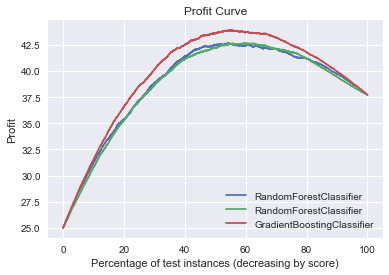

In [34]:
models = [RandomForestClassifier(n_estimators=120,\
                                         max_features = 3,
                                         max_depth =3,
    ), RandomForestClassifier(), GradientBoostingClassifier() ]

cost_benefit = np.array([[25.0, 25.0 ],[0.0 ,100.0 ]])

y_train = clean['Churn?'].as_matrix()
X_train = clean.drop('Churn?', axis=1).as_matrix()

## Test 
y_test = clean_test['Churn?'].as_matrix()
X_test = clean_test.drop('Churn?', axis=1).as_matrix()


for inx, model in enumerate(models): 
    plot_profit_curve(model, cost_benefit,  X_train, X_test, y_train, y_test,show=True)

plt.legend(loc='best')

# plot_profit_curve(model, cost_benefit, X_train, X_test, y_train, y_test,show=True)

In [43]:
## Gradient Boosted DEFAULT 
## Train Data
y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()

## Test 
y_test = clean_test['Churn?'].as_matrix()
X_test = clean_test.drop('Churn?', axis=1).as_matrix()

columns = clean_test.drop('Churn?', axis=1).columns 
p = ChurnPipeline(GradientBoostingClassifier(), False)
p.fit(X, y)

y_pred = p.predict(X_test)

print standard_confusion_matrix(y_test,y_pred )

print "Test Score of DEFAULT GradientBoostingClassifier"
print 'Accuracy Score: ', accuracy_score(y_test,y_pred ) 
print 'Precision Score: ', precision_score(y_test,y_pred ) 
print 'Recall Score: ', recall_score(y_test,y_pred )


[[5353 1332]
 [ 875 2440]]
Test Score of DEFAULT GradientBoostingClassifier
Accuracy Score:  0.7793
Precision Score:  0.800747943156
Recall Score:  0.859505459216


In [ ]:
## Gradient Boosted DEFAULT 
## Train Data
y = clean['Churn?'].as_matrix()
X = clean.drop('Churn?', axis=1).as_matrix()

## Test 
y_test = clean_test['Churn?'].as_matrix()
X_test = clean_test.drop('Churn?', axis=1).as_matrix()

columns = clean_test.drop('Churn?', axis=1).columns 
p = ChurnPipeline(GradientBoostingClassifier( 


), False)
p.fit(X, y)

y_pred = p.predict(X_test)

print standard_confusion_matrix(y_test,y_pred )

print "Test Score of DEFAULT GradientBoostingClassifier"
print 'Accuracy Score: ', accuracy_score(y_test,y_pred ) 
print 'Precision Score: ', precision_score(y_test,y_pred ) 
print 'Recall Score: ', recall_score(y_test,y_pred )